# **Theft in West Point Grey and Dunbar Southlands**

**Group 34:** Andy Hu, Wendi Ke, CC Liang, and Mridul Manas

<img src="https://raw.githubusercontent.com/fankayii/STAT201_34/main/images/theft.jpg"/>

Source: https://raw.githubusercontent.com/fankayii/STAT201_34/main/images/theft.jpg

# Introduction
Crime brings chills down everyone’s spines, with theft being the most common type of crime in Canada ([Government of Canada](https://www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html)). Section 322 of the Canadian Criminal Code defines "theft" as "fraudulently and without colour of right" taking someone's property or converting its ownership ([Criminal Code](https://laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html)). Understanding crime statistics is crucial to enhancing community relations, measuring prevention initiatives, and minimizing risks by making better decisions ([Vancouver Police Department](https://vpd.ca/crime-statistics/)). In this paper, we will study the proportion of theft crime in Dunbar-Southlands and West Point Grey, the two neighbourhoods closest to the UBC Vancouver campus ([UBC Vantage College](https://vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver)).


### Research Question
Is the proportion of theft occurring in the neighbourhood of West Point Grey higher than Dunbar-Southlands? 

### Variables
The random variable of interest for comparing is the proportion of theft in the neighbourhoods of Dunbar-Southlands and West Point Grey. Of the response variable, differences in proportions is the location parameter and standard error is the scale parameter.

### Hypotheses
- Null Hypothesis $H_0$: There is no difference between the proportion of theft in the neighbourhoods of Dunbar-Southlands and West Point Grey.
- Alternative Hypothesis $H_A$: The proportion of theft in West Point Grey is higher than in Dunbar-Southlands.

| Null Hypothesis $H_0$ | Alternate Hypothesis $H_A$ |
| --- | ----------- |
|  $$H_0: p_w - p_d = 0$$ | $$H_A: p_w - p_d > 0$$ |

### Dataset Description
To conduct our research, we use the [Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/), which includes information on the different types of crimes occurring at specific geographical locations from 2003 to 2023. We will be primarily focusing on crimes within the last 5 years, 2018 to 2022, for the neighbourhoods of Dunbar-Southlands and West Point Grey in order to base our research upon more recent and prevalent information about contemporary crimes.

# Methods and Results

### Exploratory Data Analysis

The `tideverse`, `infer`, and `broom` packages allow us to clean and wrangle tidy data, create visualizations, and make meaningful statistical inferences. We also set the default plot width and height and load colour-blind-friendly colour palettes.

In [1]:
library(tidyverse)
library(infer)
library(broom)

options(repr.plot.width = 10, repr.plot.height = 6)
palette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#000000", "#E69F00", 
    "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


As we have uploaded the dataset to our GitHub repository, we can read the csv file right from our GitHub link.

In [2]:
crime <- read.csv("https://raw.githubusercontent.com/fankayii/STAT201_34/main/data/crime.csv")
head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
2,Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
3,Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
4,Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
5,Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
6,Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


First, we check for any NA values in our dataset.

In [3]:
print(sum(is.na(crime)))

[1] 146


We discover that our dataset contains 146 NA values. Thankfully, when we `filter` for  years 2018 to 2022 (the most recent five years) and the two neighbourhoods of interest, West Point Grey and Dunbar-Southlands, the filtering will automatically drop the NA values for us.

In [4]:
crime_recent_5_years <- crime %>%
    filter(YEAR>=2018 & YEAR<=2022) %>%
    filter(NEIGHBOURHOOD %in% c("West Point Grey","Dunbar-Southlands")) %>%
    select(TYPE,NEIGHBOURHOOD)

colnames(crime_recent_5_years) <- c('type', 'neighbourhood')
head(crime_recent_5_years)

,type,neighbourhood
,<chr>,<chr>
1,Theft from Vehicle,West Point Grey
2,Theft from Vehicle,West Point Grey
3,Theft from Vehicle,West Point Grey
4,Theft from Vehicle,West Point Grey
5,Theft from Vehicle,West Point Grey
6,Theft from Vehicle,West Point Grey


Following, We transform the data such that we group our crimes by 'theft' and 'not theft' using the R functions `mutate` and `case_when`.

In [5]:
crime_transform <- crime_recent_5_years %>%
  mutate(type = case_when(
    type %in% c("Other Theft", "Theft from Vehicle", "Theft of Bicycle", "Theft of Vehicle") ~ "theft",
    TRUE ~ "not_theft"
  ))
head(crime_transform)

,type,neighbourhood
,<chr>,<chr>
1,theft,West Point Grey
2,theft,West Point Grey
3,theft,West Point Grey
4,theft,West Point Grey
5,theft,West Point Grey
6,theft,West Point Grey


Our data is now tidy and in the format we would like. We can now compute some initial observations about the data.

In [6]:
crime_type_pivot <- crime_transform %>%
    group_by(neighbourhood, type) %>%
    summarize(count = n(), .groups = 'drop') %>%
    pivot_wider(names_from = type,
                values_from = count) %>%
    mutate(total_crime = not_theft + theft,
           prop = theft / total_crime)
    
head(crime_type_pivot)

neighbourhood,not_theft,theft,total_crime,prop
<chr>,<int>,<int>,<int>,<dbl>
Dunbar-Southlands,915,1250,2165,0.5773672
West Point Grey,801,1132,1933,0.5856182


Let us tidy this even further so that we retain only the required information, and also calculate the observed test statistic $\hat{p}_1-\hat{p}_0$, which is the proportion of theft in West Point Grey subtracted by the proportion of theft in Dunbar-Southlands.

In [7]:
crime_estimates <- crime_type_pivot |>
    select(neighbourhood, total_crime, prop) |>
    pivot_wider(names_from = neighbourhood, values_from=c(total_crime, prop))

colnames(crime_estimates) <- c('n_ds', 'n_wpg', 'p_ds', 'p_wpg')

crime_estimates <- crime_estimates |>
    mutate(prop_diff = p_wpg - p_ds)

crime_estimates

n_ds,n_wpg,p_ds,p_wpg,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004


Let us explore the relationship between our categorical variables `type` and `neighbourhood` with a visual demonstration.

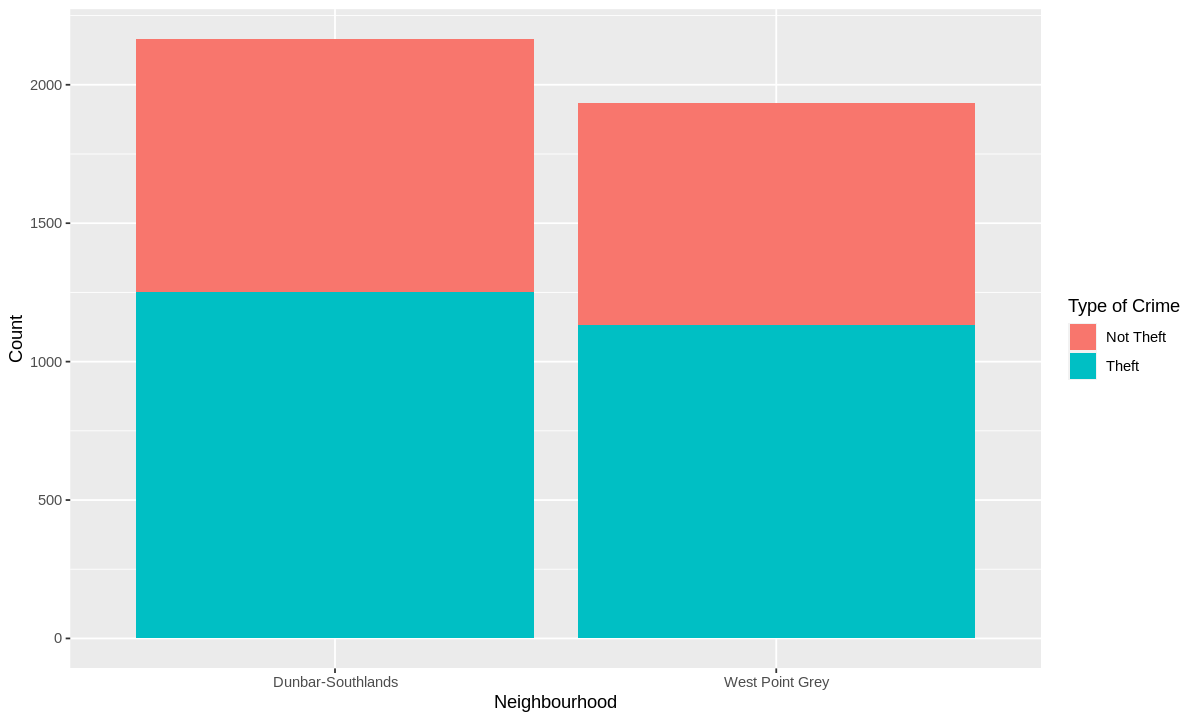

In [8]:
ggplot(crime_transform, aes(x = neighbourhood, fill = type)) + 
    geom_bar() + 
    labs(x = "Neighbourhood", y = "Count", fill = "Type of Crime") + 
    scale_fill_discrete(labels = c('Not Theft', 'Theft'))

From the plot and previous tables, we observe that the proportion of theft crime are similar for the two neighbourhoods but West Point Grey is slightly higher. We can also see that for both neighbourhood, theft is the majority type of crime. Recall that the observed test statistic of the difference in proportions is 0.008251004. From the plot, we canont easily conclude anything significant about the difference in proportions of theft in both neighbourhoods, meaning that we will have to make use of some statistical analysis.

In [9]:
# two_neighbourhoods_all_crime <- crime_recent_5_years %>%
#     group_by(neighbourhood, type) %>%
#     summarize(count = n(), .groups = 'drop') %>%
#     ggplot(aes(x = neighbourhood, y = count, fill = type)) +
#     geom_bar(stat = "identity") +
#     labs(title = "All Crime Count in the two Neighbourhoods",
#          x = "Neighbourhood",
#          y = "Number of Crime",
#          colour = "Type of Crime") +
#     theme(text = element_text(size = 15)) +
#     scale_fill_manual(values = palette)

# two_neighbourhoods_all_crime

In [10]:
# Next, we combine the major crime type into one: break and enter, theft, vehicle collision, and others.

In [11]:
# group_by_crime <- crime_recent_5_years %>%
#     group_by(neighbourhood, type) %>%
#     summarize(count = n()) %>%
#     ggplot(aes(x = neighbourhood, y = count, fill = type)) +
#     geom_bar(stat = "identity") +
#     labs(title = "All Large Crime Type Combined",
#          x = "Neighbourhood",
#          y = "Number of Crime",
#         colour = "Type of Crime") +
#     theme(text = element_text(size = 15)) +
#     scale_fill_manual(labels = c("Break and Enter Commercial", "Break and Enter Residential/Other", "Homicide", "Mischief", 
#                                   "Offence Against a Person", "Other Theft", "Theft from Vehicle", "Theft of Bicycle", 
#                                   "Theft of Vehicle", "Vehicle Collision or Pedestrian Struck (with Fatality)", 
#                                   "Vehicle Collision or Pedestrian Struck (with Injury)"), 
#                        values = c("#E69F00", "#E69F00", "#56B4E9", "#56B4E9", "#56B4E9", "#009E73", "#009E73", "#009E73", 
#                                   "#009E73", "#CC79A7", "#CC79A7"))
# group_by_crime

In [12]:
# From this plot, we can see that theft is indeed the most common type of crime as it has the greatest areas on the graph.

In [13]:
# estimate_proportion_plot <- ggplot(crime_summary, aes(x = NEIGHBOURHOOD, y = prop, fill = NEIGHBOURHOOD)) +
#     geom_bar(stat = "identity") +
#     labs(title = "Proportion of Theft in Two Neighbourhoods",
#        x = "Neighbourhoods",
#        y = "Proportion of Theft") +
#     theme(text = element_text(size = 15)) +
#     scale_fill_manual(values= c("#D55E00", "#CC79A7"))
# estimate_proportion_plot

In [14]:
# We can see that the proportion of theft crime are similar for the two neighbourhoods but West Point Grey is slightly higher. We can also see that for both neighbourhood, theft is the majority type of crime.

Now that We have completed the exploratory data analysis (EDA), we will move onto the actual analysis.

### Methods

We will be using both asymptotics and bootstrapping to conduct our research to discover whether West Point Grey has a higher proportion of theft compared to Dunbar-Southlands. 

For asymptotics, we must rely on the Central Limit Theorem because proportions do not follow a random distribution and so the distribution is clearly non-normal, since the random variable is between zero and one. Thus, we rely on the CLT, which for our case, states that the distribution of sample proportions will approach a normal distribution as we increase the sample size and number of total samples. For this approach, we will also assume that the sample was randomly drawn from the population and that the sample values are independent of each other, meaning that the chance of committing one crime does not directly correlate with the chance of another crime occuring. We must also ensure that our sample size is large enough, such that `n(1-p) >= 10` and `np >= 10`. Using the central limit theorem, we are then able to work under the assumption that the sampling distribution of proportions follows a normal distribution centered around the sample proportion and that its standard error follows as $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$. Since we are comparing a difference in proportions, we will carry a two-sample independent z-test using the following test statistic: 
$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}.
$$

For the bootstrapping approach, we will first set the seed because we will be introducing randomness through bootstrapping, and we want to ensure that our results are reproducible. Afterwards, we will take a large number of bootstrap samples from our crime sample dataset to create a bootstrap distribution for a difference in proportions.

For both approaches, we can find the p-value to check for any statistically significant findings to decide whether or not to reject the null hypothesis or fail to reject the null hypothesis. Additionally, we are able to find a confidence interval using both methods to capture with a certain degree of confidence that the true proportion difference falls within 

First, we start by loading the packages and dataset, and proceed to tidy it. 

### Results Using Asymptotics

We can conduct a two-sample z-test to calculate the proportion differences. Recall that we have already stored the results of the counts of crime in both neighbourhoods, along with the proportion of thefts in both neighbourhoods in the data frame `crime_estimates`.



In [15]:
crime_estimates

n_ds,n_wpg,p_ds,p_wpg,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004


Since we are using theory-based methods, we have to make sure that 
`np >= 10` and `n(1-p) >= 10` for both neighbourhoods. We have that $2165*0.5773672 \approx 1250 \geq 10$ and $2165*(1-0.0.5773672) \approx 915 \geq 10$ for Dunbar-Southlands. Likewise for West Point Grey, $1933*0.5856182 \approx 1130 \geq 10$ and 
$1933*0.5856182 \approx 800 \geq 10$. Nice! Since we satisfy the 'success-failure' condition for a large enough sample size, and we are assuming that the sample dataset was random and the samples were independent of each other, we can use the Central Limit Theorem. 

We proceed to calculate the null distribution standard error by first calculating a pooled proportion. 

In [16]:
crime_asymptotics <- crime_estimates |>
    mutate(pooled_proportion = (n_ds*p_ds + n_wpg*p_wpg)/(n_ds + n_wpg),
           null_std_error = sqrt(pooled_proportion * (1-pooled_proportion) * (1/n_ds + 1/n_wpg)))

crime_asymptotics

n_ds,n_wpg,p_ds,p_wpg,prop_diff,pooled_proportion,null_std_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004,0.5812592,0.01543827


We can now easily find a 95% confidence interval using asymptotics.

In [17]:
obs_prop_diff_asymptotics <- crime_asymptotics$prop_diff
null_std_error <- crime_asymptotics$null_std_error

prop_ci_asymptotics <- tibble(
    lower_ci = qnorm(0.025, obs_prop_diff_asymptotics, null_std_error),
    upper_ci = qnorm(0.975, obs_prop_diff_asymptotics, null_std_error))

prop_ci_asymptotics

lower_ci,upper_ci
<dbl>,<dbl>
-0.02200745,0.03850946


We note that 0 is included in the interval, meaning that is is likely that we may fail to reject the null hypothesis. We can visualize this confidence interval as shown below. 

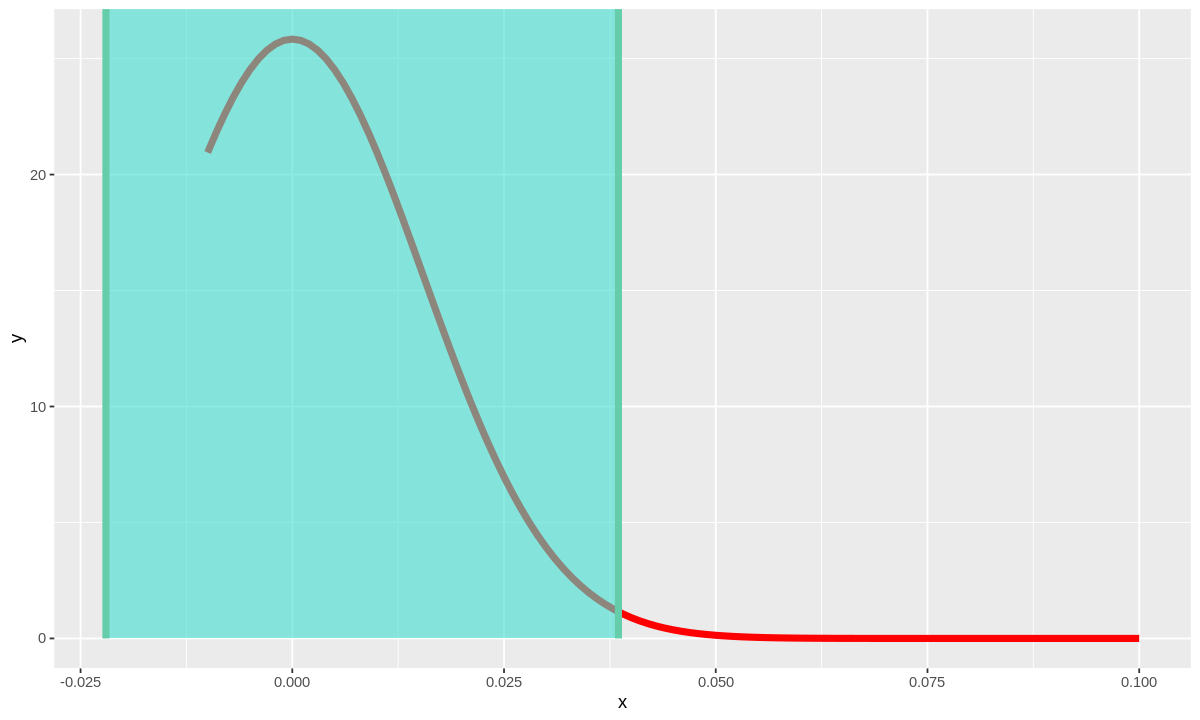

In [18]:
x = seq(-0.01, 0.1, by=0.001)
y <- dnorm(x, 0, null_std_error)
normal_data <- tibble(x, y)

normal_data |>
    ggplot(aes(x, y)) + 
    geom_line(color = 'red', lwd=2) + 
    shade_confidence_interval(endpoints = prop_ci_asymptotics)

Finally, we will obtain the p-value.

In [19]:
p_value_asymptotics <- pnorm(obs_prop_diff_asymptotics, 0, null_std_error, lower.tail=F)
p_value_asymptotics

[1] 0.2965147

Clearly, the p-value above is greater than the significance level we set at 0.05, indicating that we fail to reject the null hypothesis.
We can visualize this result with a plot.

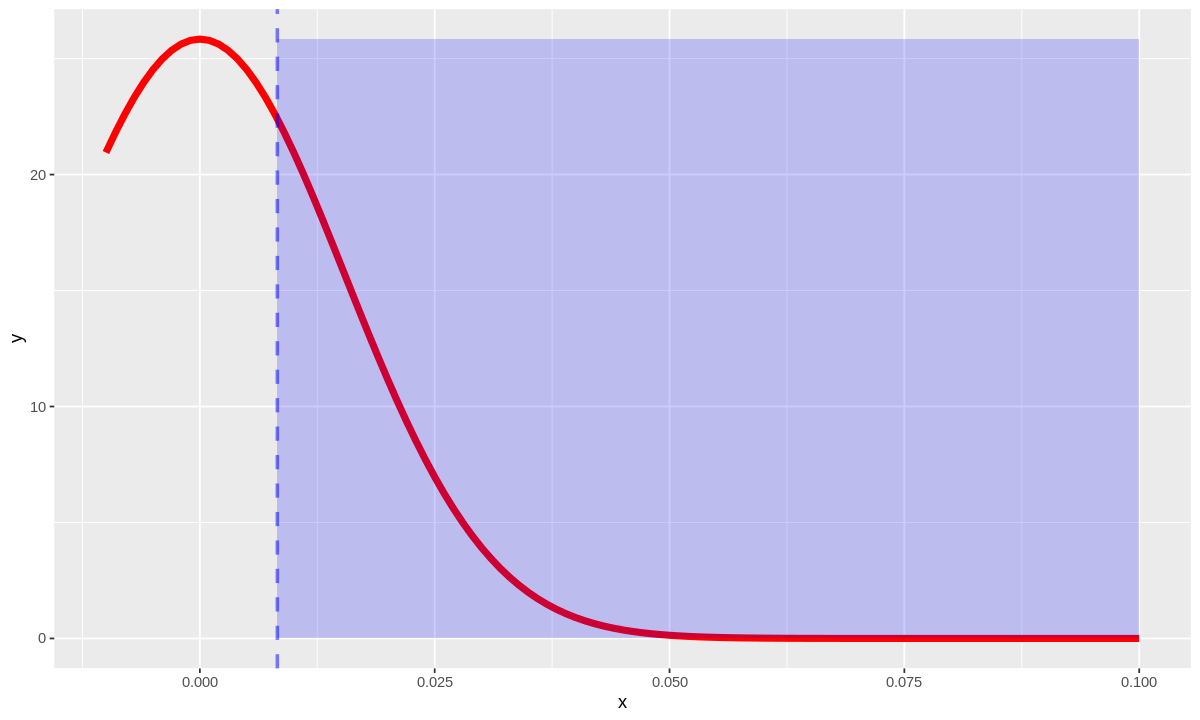

In [20]:
normal_data |>
    ggplot(aes(x, y)) + 
    geom_line(color = 'red', lwd=2) + 
    geom_ribbon(aes(xmin = obs_prop_diff_asymptotics,
                    xmax = max(x)),
                    alpha = 0.2,
                    fill = 'blue') + 
    geom_vline(xintercept = obs_prop_diff_asymptotics, lwd=1, alpha = 0.5, color='blue', linetype='dashed')

In addition, we can use `prop.test` to do the same thing for us and check our answer.

In [21]:
c_wpg <- crime_estimates$n_wpg * crime_estimates$p_wpg
c_ds <- crime_estimates$n_ds * crime_estimates$p_ds

prop_test <- tidy(
    prop.test(x = c(c_wpg, c_ds),
              n = c(crime_estimates$n_wpg, crime_estimates$n_ds),
              correct = FALSE,
              alternative = "greater"))
prop_test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5856182,0.5773672,0.2856382,0.2965147,1,-0.01713783,1,2-sample test for equality of proportions without continuity correction,greater


As we can see, the p-value using asymptotics and prop.test gives us the same result, yet it is slightly different from what we got using the infer package.

### Results Using the Infer Package for Bootstrapping

We will first obtain the null hypothesis using the infer package after setting the seed to make the analysis reproducible. We first specify our response variable of `type` and explanatory variable of `neighbourhood`. We hypothesize that the two samples are independent of each other in the hypothesized universe, and ensure that we generate replicates of shuffled data with the `permute` argument. Recall that we are calculating a difference in proportions of West Point Grey subtractred by Dunbar-Southlands.

In [28]:
set.seed(1)

null_model <- crime_transform %>%
    specify(type ~ neighbourhood, success = "theft") %>%
    hypothesise(null = "independence") %>%
    generate(reps = 2000, type = "permute") %>%
    calculate(stat = "diff in props", order = c("West Point Grey", "Dunbar-Southlands"))
head(null_model)

replicate,stat
<int>,<dbl>
1,-0.01622960
2,-0.02308417
3,0.02000170
4,-0.01329193
5,-0.02014650
6,-0.02798030


We can quickly calculate the observed difference in theft proportions using the infer package. This should give us the same value as the proportion difference we calculated in the `crime_estimates` dataframe.

In [29]:
obs_prop_diff <- crime_transform %>%
    specify(type ~ neighbourhood, success = "theft") %>%
    calculate(stat = "diff in props", order = c("West Point Grey", "Dunbar-Southlands"))
obs_prop_diff

stat
<dbl>
0.008251004


We now visualize how surprised we would be by the observed proportion difference of 0.00825 in the null model which hypothesizes a universe where the neighbourhood has no impact on the theft proportion.

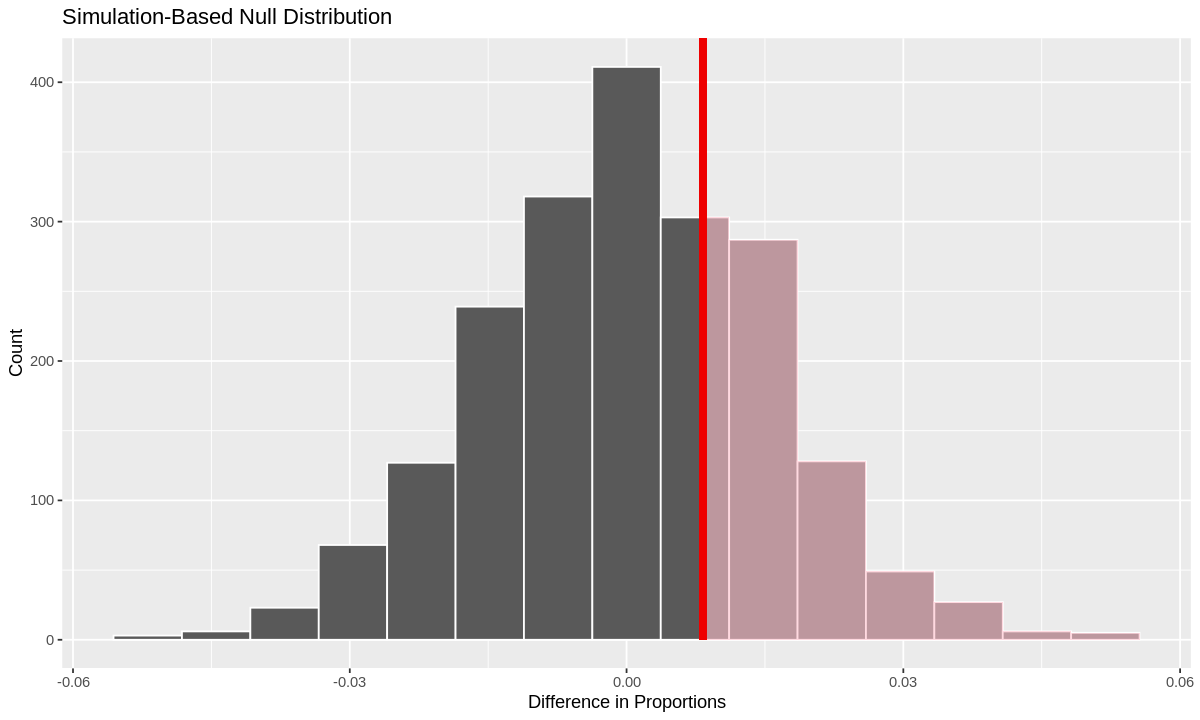

In [30]:
theft_result_plot <- 
   null_model %>%
   visualize() + 
   shade_p_value(obs_stat = obs_prop_diff, direction = "right")+
   labs(x = "Difference in Proportions",
        y = "Count")
theft_result_plot

We can compute the p_value using `get_p_value`.

In [31]:
p_value_infer <- null_model %>%
    get_p_value(obs_stat = obs_prop_diff, direction = "right") |>
    pull()
p_value_infer 

[1] 0.3185

Recall that using asymptotics, we had calculated a p-value of 0.2965147. That's pretty close to the p-value computed using bootstrapping! This further solidifes our conclusion that we fail to reject the null hypothesis at a 5% significance level, since it is very likely to observe the observed proportion difference in a hypothesized universe where theft rates are the same everywhere.

Now, we will jump from conducting the hypothesis test to calculating a 95% confidence interval using the percentile and standard error method by bootstrapping from our crime sample.

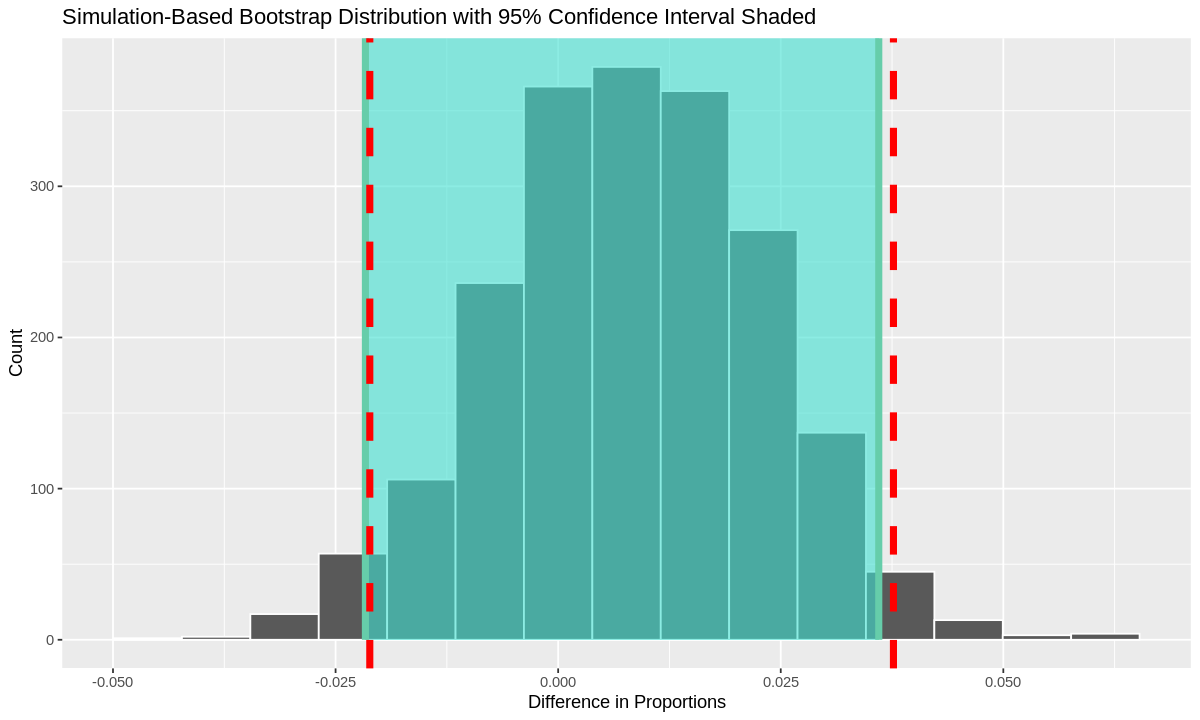

In [32]:
bootstrap_distribution <- crime_transform %>%
    specify(type ~ neighbourhood, success = "theft") %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "diff in props", order = c("West Point Grey", "Dunbar-Southlands"))

percentile_ci <- bootstrap_distribution |> 
    get_confidence_interval(level = 0.95, type = 'percentile')

se_ci <- bootstrap_distribution %>% 
  get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = obs_prop_diff)

visualize(bootstrap_distribution) + 
    shade_confidence_interval(endpoints = percentile_ci) + 
    labs(x= "Difference in Proportions",
         y = "Count",
         title = "Simulation-Based Bootstrap Distribution with 95% Confidence Interval Shaded") + 
    geom_vline(xintercept=pull(se_ci[1]), linetype='dashed', lwd=2, colour='red') + 
    geom_vline(xintercept=pull(se_ci[2]), linetype='dashed', lwd=2, colour='red')
    

The shaded portion represents the 95% confidence interval using the percentile method, while the other uses the standard error theory-based method.

Now that we have calculated the results for our research, let us summarize them in two tables. The first one shows the confidence intervals using both methods, while the latter shows the p-values of the different approaches.

In [ ]:
ci <- tibble(

# Discussion
In this section, you’ll interpret the results you obtained in the previous section with respect to the main question/goal of your project.

* Summarize what you found, and the implications/impact of your findings.
* If relevant, discuss whether your results were what you expected to find.
* Discuss future questions/research this study could lead to.

We expect that West Point Grey will have a statistically significant higher proportion of theft compared to Dunbar Southlands, because it is closer to the UBC campus, which likely has a higher population density and floating population.

One drawback of our study is while big data may explain differences in the danger of theft and support governmental measures, it cannot explain individual cases or provide detailed plan of how to minimize the risks. Furthermore, a challenge we face is how to extrapolate our analysis to predict future crime rates, as that is the only important information for reducing crimes.

Our findings could impact residents living in either neighbourhoods if not both to be more aware of theft in their area and enforce relevant safety measures. It can also help individuals, especially UBC students living off-campus to decide which neighbourhood they would rather live in should that have related items such as bicycles or vehicles.


Should we find a statistical significance between the proportion of theft in both areas, it may raise further questions in determining the underlying motivations behind such thefts and what features cause an increase in theft in one area compared to another.

# References
Branch, Legislative Services. “Consolidated Federal Laws of Canada, Criminal Code.” Criminal Code, 27 July 2023, [laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html](laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html). 

Crime Statistics. “Crime Statistics.” Vancouver Police Department, 19 July 2023, [vpd.ca/crime-statistics/](vpd.ca/crime-statistics/). 

Government of Canada, Department of Justice. “State of the Criminal Justice System - 2019 Report.” Results by Outcome, 7 July 2021, [www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html](www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html). 

UBC. “Your Guide to Neighborhoods in Vancouver: UBC Vantage College.” Your Guide to Neighborhoods in Vancouver | UBC Vantage College, [vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver](vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver). Accessed 30 July 2023. 

Vancouver Police Department. “Vancouver Police Department Crime Data.” Accessed 30 July 2023. 